# Universidad de Buenos Aires
# Deep Learning - Examen
# Octubre 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el Lunes 23 de Octubre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen OCTUBRE 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dado el grafo de cómputo de la siguiente imagen:

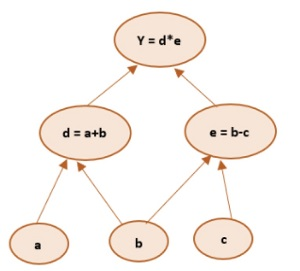

Donde a=1, b=2 y c=3

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:
  
    a. En forma analítica (dy/dx = 0)
  
    b. Aplicando regla de la cadena

    c. Utilizando pytorch

3. Comparar los resultados del punto 2

In [2]:
# Imports
import numpy as np
import torch

In [3]:
# inicio de inputs
a = np.random.random()
b = np.random.random()
c = np.random.random()

print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

a: 0.7986355538779524
b: 0.5385326759391543
c: 0.9369516611365907


### Inciso 1

In [4]:
# 1 Forward
d = a + b
e = b - c
Y = d*e

print (f'Y = {Y}')

Y = -0.5327532091619841


### Inciso 2

#### 2.a)

In [5]:
# 2_a
# Derivadas Parciales Analitica


dY_da = (b - c)
dY_db = a + 2*b -c
dY_dc = -(a + b)

# Igualanado a 0 las derivadas parciales no se se obtienen
# valores únicos. Queda indeterminado
# b = c = -a

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')


dY/da = -0.39841898519743635
dY/db = 0.9387492446196704
dY/dc = -1.3371682298171068


#### 2.b)

In [6]:
# 2_b Derivadas Parciales Regla de la cadena

dY_dd = e # dY/dd
dY_de = d # dY/de

dd_da =  1 # dd/da
dd_db =  1 # dd/db
de_db =  1 # de/db
de_dc = -1 # de/dc

dY_da = dY_dd*dd_da                # dY/da
dY_db = dY_dd*dd_db + dY_de*de_db  # dY/db
dY_dc = dY_de*de_dc                # dY/dc  

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')

dY/da = -0.39841898519743635
dY/db = 0.9387492446196705
dY/dc = -1.3371682298171068


#### 2.c)

In [7]:
# 2_c Derivadas Parciales utilizando Pytorch

a = torch.tensor([a], requires_grad=True)
b = torch.tensor([b], requires_grad=True)
c = torch.tensor([c], requires_grad=True)

print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

a: tensor([0.7986], requires_grad=True)
b: tensor([0.5385], requires_grad=True)
c: tensor([0.9370], requires_grad=True)


In [8]:
# Forward
d = a + b
e = b - c
Y = d*e

print (f'Y = {Y}')

Y = tensor([-0.5328], grad_fn=<MulBackward0>)


In [9]:
external_grad = torch.tensor([1.])
Y.backward(external_grad)

In [10]:
dY_da = a.grad # dY/da
dY_db = b.grad # dY/db
dY_dc = c.grad # dY/dc 

print(f'dY/da = {dY_da}')
print(f'dY/db = {dY_db}')
print(f'dY/dc = {dY_dc}')

dY/da = tensor([-0.3984])
dY/db = tensor([0.9387])
dY/dc = tensor([-1.3372])


### Inciso 3

En todos los casos las derivadas dan lo mismo

## Ejercicio 2



a) Implemente un modelo de red recurrente con la arquitectura presentada en la imagen. La misma debe tener:


* Como input una señal de 4 canales (4 features)
* 3 capas ocultas con 20 neuronas.
* Tenga como salida una señal de 2 canales (2 features) de igual longitud que la señal de entrada. (ayuda! emplee 2 capas recurrentes independientes)


b) Testeear el modelo con una señal random de longitud 20.

c) Indique el total de parámetros entrenables.



![c](https://drive.google.com/uc?export=view&id=1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W)



Imagen 3 link (https://drive.google.com/file/d/1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W/view?usp=drive_link)



In [11]:
class RNN_clas(torch.nn.Module):
  def __init__(self, input_size=2, hidden_size=40, num_layers=2, out_fc=5):
    super().__init__()
    self.rnn1 = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, out_fc )

  def forward(self, x):
    x, h = self.rnn1(x)
    o_fc = self.fc(x[:,-1]) # le paso el hidden state final de la rrn1
                      # esto será de largo igual al numero de hidden
                      # tiene sentido pasar el hidden final por que tendrá
                      # la información de la secuencia en entrada ya "almacenada"
    # o_fc_prob = torch.softmax(o_fc, 1)
    return o_fc, o_fc # acá repito la salida ya que mi funcion "teoria"
                                # espera que el modelo arroje 2 salidas.

In [12]:
def imp_param(model):
  print('-'*84)
  print('PARAMETROS DEL MODELO')
  print('-'*84)
  for name, param in model.named_parameters():
    if param.requires_grad:
      print('Nombre del parámetro: ')
      print(name)
      print('Tamaño del parámetro: ')
      print(param.data.shape)
      print()

In [13]:
def teoria(model, largo_entrada = 3, batch_size=1):
  print('-'*84)
  print('MODELO')
  print('-'*84)
  print(model)
  imp_param(model)

  # Generamos una entrada aleatoria para ver como responde la red
  # el tamaño de la entrada esa acorde a los tamaños que cargamos antes
  entrada = torch.rand(batch_size, largo_entrada, input_size)
  print('-'*84)
  print('ENTRADA')
  print('-'*84)
  print('entrada shape: ', entrada.shape)
  print(entrada)

  # le agrego la dimension del batch:
  #entrada = entrada[None, :]
  print()
  print('entrada con nuevas dimensiones [batch, Length, nr_features] ')
  print(entrada.shape)

  # Pasamos la entrada a la red
  o, h = model(entrada)
  print('-'*84)
  print('SALIDA')
  print('-'*84)
  print('salida de la red (output) (largo igual al input): ', o.shape)
  print(o)
  print()
  print('hidden red (solo ultimo hidden): ', h.shape)
  print(h)


In [14]:
input_size= 4
batch_size=1
hidden_size=20
num_layers=3

largo_entrada = 20

model = RNN_clas(input_size, hidden_size, num_layers)
teoria(model, largo_entrada, batch_size)

------------------------------------------------------------------------------------
MODELO
------------------------------------------------------------------------------------
RNN_clas(
  (rnn1): RNN(4, 20, num_layers=3, batch_first=True)
  (fc): Linear(in_features=20, out_features=5, bias=True)
)
------------------------------------------------------------------------------------
PARAMETROS DEL MODELO
------------------------------------------------------------------------------------
Nombre del parámetro: 
rnn1.weight_ih_l0
Tamaño del parámetro: 
torch.Size([20, 4])

Nombre del parámetro: 
rnn1.weight_hh_l0
Tamaño del parámetro: 
torch.Size([20, 20])

Nombre del parámetro: 
rnn1.bias_ih_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn1.bias_hh_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn1.weight_ih_l1
Tamaño del parámetro: 
torch.Size([20, 20])

Nombre del parámetro: 
rnn1.weight_hh_l1
Tamaño del parámetro: 
torch.Size([20, 20])

Nombr

## Ejercicio 3

Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Analizar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.


In [15]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn import metrics

### 1.-  Armado del Dataset

In [16]:
df = pd.read_csv('ratings.csv')
print(df['userId'].unique().shape)
print(df['movieId'].unique().shape)
print(df.shape)

(610,)
(9724,)
(100836, 4)


In [17]:
# Filtrado
pelis = df.groupby(['movieId'])['userId'].count().sort_values(ascending=False)[:200].index
df1 = df.groupby(['userId'])['movieId'].count()
usuarios = df1[df1 >= 100].index
dfFiltrado = df[(df['userId'].isin(usuarios)) & (df['movieId'].isin(pelis))]

print(dfFiltrado['userId'].unique().shape)
print(dfFiltrado['movieId'].unique().shape)
print(dfFiltrado.shape)

(248,)
(200,)
(18588, 4)


### 2.- Red

In [18]:
# Divido el dataset
idx = np.random.permutation(dfFiltrado.shape[0])
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

# armamos una array con los datos de entrenamiento y validacion

pelis    = np.array(dfFiltrado.iloc[idx]['movieId'])
usuarios = np.array(dfFiltrado.iloc[idx]['userId'])
rating   = np.array(dfFiltrado.iloc[idx]['rating'])

pelis_train = pelis[train_idx] 
users_train = usuarios[train_idx]
rating_train = rating[train_idx]
                      
pelis_valid = pelis[valid_idx] 
users_valid = usuarios[valid_idx]
rating_valid = rating[valid_idx]


n_train = rating_train.shape[0]
n_valid = rating_valid.shape[0]

In [19]:
rating.dtype

dtype('float64')

In [20]:
# armamos un diccionario que me mapee el un índex
# para pelis
peli_to_idx = {peliId: i for i, peliId in enumerate(set(pelis))}
idx_to_peli = {i:peliId for i, peliId in enumerate(set(pelis))}
# Vector de pelis_idx en el dataset
pelis_idx = np.array([peli_to_idx[value] for value in pelis])
# Divido el vector pelis_idx en entrenamiento y validación
pelis_idx_train = pelis_idx[train_idx]
pelis_idx_valid = pelis_idx[valid_idx]

# para usuarios
user_to_idx = {userId: i for i, userId in enumerate(set(usuarios))}
idx_to_user = {i:userId for i, userId in enumerate(set(usuarios))}
# Vector de users_idx en el dataset
users_idx = np.array([user_to_idx[value] for value in usuarios])
# Divido el vector users_idx en entrenamiento y validación
users_idx_train = users_idx[train_idx]
users_idx_valid = users_idx[valid_idx]

print('diccionario de vocabulario Pelis')
print(peli_to_idx)
print('diccionario de vocabulario Usuarios')
print(user_to_idx)

diccionario de vocabulario Pelis
{1: 0, 33794: 1, 2: 2, 6: 3, 10: 4, 2571: 5, 1036: 6, 527: 7, 16: 8, 19: 9, 21: 10, 539: 11, 541: 12, 32: 13, 34: 14, 551: 15, 39: 16, 3114: 17, 1580: 18, 47: 19, 1584: 20, 1073: 21, 50: 22, 1080: 23, 2617: 24, 68157: 25, 1089: 26, 2115: 27, 2628: 28, 1097: 29, 1610: 30, 587: 31, 3147: 32, 1101: 33, 586: 34, 590: 35, 592: 36, 593: 37, 1617: 38, 595: 39, 589: 40, 588: 41, 597: 42, 95: 43, 608: 44, 5218: 45, 104: 46, 110: 47, 111: 48, 1136: 49, 1653: 50, 2683: 51, 2174: 52, 4226: 53, 648: 54, 48780: 55, 141: 56, 2706: 57, 1682: 58, 150: 59, 153: 60, 2716: 61, 44191: 62, 161: 63, 60069: 64, 165: 65, 1704: 66, 1193: 67, 8360: 68, 1196: 69, 1197: 70, 1198: 71, 1200: 72, 8368: 73, 1206: 74, 5816: 75, 185: 76, 1210: 77, 1721: 78, 1208: 79, 1213: 80, 1214: 81, 58559: 82, 7361: 83, 1219: 84, 1732: 85, 1221: 86, 1222: 87, 1220: 88, 2762: 89, 208: 90, 3793: 91, 4306: 92, 1240: 93, 6874: 94, 733: 95, 1246: 96, 6365: 97, 736: 98, 223: 99, 5349: 100, 2791: 101, 231: 

In [21]:
# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(Dataset):

  def __init__(self, movieId, userId, y):
    
    self.movieId = movieId
    self.userId = userId
    self.y = y

  def __len__(self):
    return self.y.shape[0]

  def __getitem__(self, idx):
    return self.movieId[idx], self.userId[idx], self.y[idx]

In [22]:
pelis_idx_train.dtype

dtype('int32')

In [23]:
pd.DataFrame([pelis_idx_train, users_idx_train, rating_train], index=['movieId', 'userId', 'rating']).transpose()

,movieId,userId,rating
0,171.0,102.0,3.0
1,184.0,98.0,4.0
2,125.0,198.0,4.0
3,168.0,220.0,2.5
4,171.0,241.0,4.0
...,...,...,...
15794,31.0,105.0,3.5
15795,43.0,45.0,3.0
15796,79.0,55.0,5.0
15797,120.0,9.0,3.0


In [24]:
train_ds_embeddings = MyDatasetWithEmbddings(pelis_idx_train, users_idx_train, rating_train)
valid_ds_embeddings = MyDatasetWithEmbddings(pelis_idx_valid, users_idx_valid, rating_valid)

In [25]:
train_ds_embeddings[:2]

(array([171, 184]), array([102,  98]), array([3., 4.]))

In [26]:
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size=64)

In [27]:
class red(torch.nn.Module):
    
    def __init__(self, vocab_size1, embedding_dim1, vocab_size2, embedding_dim2):
        super(red, self).__init__()

        self.embeddings1 = torch.nn.Embedding(vocab_size1, embedding_dim1)
        self.embeddings2 = torch.nn.Embedding(vocab_size2, embedding_dim2)        
        self.linear1 = torch.nn.Linear(embedding_dim1 + embedding_dim2, 200, bias=True)
        self.act1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 100)
        self.act2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(100, 1)

    def forward(self, peli, usuario):
        embeds1 = self.embeddings1(peli)
        embeds2 = self.embeddings2(usuario)
        final_input = torch.cat([embeds1, embeds2], dim=1)
        out = self.linear1(final_input)
        out = self.act1(out)
        out = self.linear2(out)
        out = self.act2(out)
        out = self.output(out)
        return out
    
    def predecir(self, movieId:int, userId:int):
          pelis_idx = peli_to_idx[movieId]
          users_idx = user_to_idx[userId]
          pelis_idxs = torch.tensor([pelis_idx], dtype=torch.int).to(device)
          user_idxs = torch.tensor([users_idx], dtype=torch.int).to(device)
          
          return self.forward(pelis_idxs, user_idxs)      

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"


model = red(vocab_size1=len(set(pelis)), embedding_dim1=8, vocab_size2=len(set(usuarios)), embedding_dim2=8)

# si quiero cargar un modelo ya entrenado:
# model.load_state_dict(torch.load(os.path.join('./', "embeddings_pelisYusersEmbSize8.pt"), map_location=device))

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=0.01) #, momentum=0.1)

emb_partida1 = np.copy(model.embeddings1.weight.detach().numpy())
emb_partida2 = np.copy(model.embeddings2.weight.detach().numpy())

model.to(device)

print(emb_partida1)
print(emb_partida2)

[[ 0.04951615  1.7289083   0.8823093  ... -1.3016157   0.65092367
  -1.1301513 ]
 [ 1.5566751   0.03623357  0.23513825 ...  0.3639612   0.22469826
   0.96580946]
 [-0.67067325  0.27057713 -2.3065014  ... -0.01382454 -3.344518
   0.35681942]
 ...
 [ 1.2904696   0.28393465  0.07747779 ...  1.0124693  -1.0070524
   1.4186555 ]
 [ 0.39872253  2.083221   -0.6860728  ...  0.60669875 -0.5619655
   0.66777635]
 [ 0.8421326  -0.20674138 -2.008998   ... -0.10391193  1.4106698
  -0.01116029]]
[[-0.87396616 -0.5114781  -3.2541993  ... -0.08639237 -0.7559231
  -0.09422134]
 [ 1.0022377  -0.48747152 -0.88634807 ... -1.0549464   0.13602649
   0.46130478]
 [-0.49570048 -0.86380106  0.6090455  ...  0.6405139  -0.9921114
  -0.14881769]
 ...
 [-0.6301519  -0.78988993 -0.24091303 ...  0.4750626  -1.0917602
  -1.8775684 ]
 [-0.04516913  1.38623     0.2217495  ...  1.6346664  -0.26444373
   0.585748  ]
 [ 1.6411557  -1.0894276   0.38183624 ... -1.250144   -1.23497
  -0.5733561 ]]


In [29]:
# Mini-Batch

# cantidad de epochs
epochs = 4

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  model.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader_emb):
    # Obtengo los datos del batch de entrenamiento
    embed_batch1, embed_batch2, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    embed_batch1 = embed_batch1.to(device).int()
    embed_batch2 = embed_batch2.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = model(embed_batch1, embed_batch2)
    y_batch_hat = nnet_output
    
    # Esto lo quito porque no es clasificacion
    # y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()  

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  
  # No aplica el accuracy en una regresión
  # accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  model.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader_emb):
    # Obtengo los datos del batch de validación
    embed_batch1, embed_batch2, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    embed_batch1 = embed_batch1.to(device).int()
    embed_batch2 = embed_batch2.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = model(embed_batch1, embed_batch2)
    
    # Esto lo quito porque no es clasificacion
    #y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss) 
  # Cálculo la métrica de la epoch
  # No aplica el accuracy en una regresión,a sique uso solo la loss
  # valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | ")
        
        # print(f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.032 / 0.013 | 
 Epoch 1 | Train/Valid loss: 0.012 / 0.012 | 
 Epoch 2 | Train/Valid loss: 0.012 / 0.012 | 
 Epoch 3 | Train/Valid loss: 0.012 / 0.011 | 


Text(0, 0.5, 'MSE')

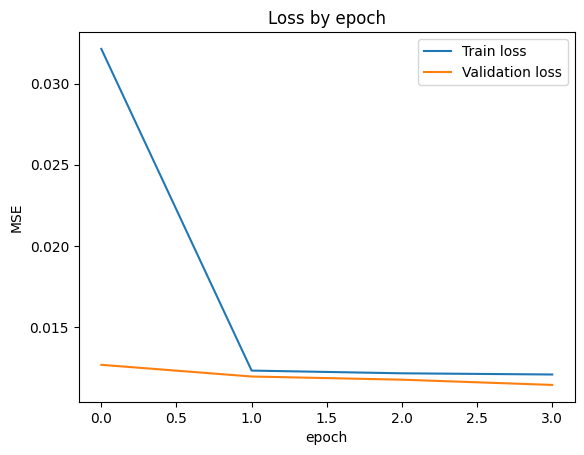

In [30]:
# Grafica loss por epoch
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("MSE")

Se ve que el modelo en muy poquitas épocas resuelve

### 3.- Predicciones

In [31]:
# Se predicen todos los datos y se genera un df con los datos reales y los predichos
model.to(device)
pelis_idxs = torch.tensor(pelis_idx, dtype=torch.int).to(device)
user_idxs = torch.tensor(users_idx, dtype=torch.int).to(device)
df_test = pd.DataFrame([pelis, usuarios, rating], index=['movieId', 'userId', 'rating']).transpose()
df_test['predict'] = model(pelis_idxs,user_idxs).cpu().detach().numpy()

In [32]:
df_test[['movieId', 'userId']] = df_test[['movieId', 'userId']].astype('int32')
df_test2 = df_test.set_index(['userId', 'movieId']).sort_index()
df_test2.loc[6]

,rating,predict
movieId,,
2,4.0,3.762066
6,4.0,3.918293
10,3.0,3.467000
16,4.0,3.956585
19,2.0,3.380004
21,2.0,3.621354
32,4.0,3.718798
34,4.0,3.962471
47,4.0,3.916779


In [33]:
# Predecir un usuario y pelicula en particular
movieId = 367
userId = 6
predict = model.predecir(movieId, userId)
predict

tensor([[3.7294]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 4.- Recomendaciones

In [34]:
# Voy a calcular la similaridad coseno entre el embedding de 
# la pelicula mejor rankeada por el usuario con todos los otros
# embeddings de peliculas

movie_max = df_test2.loc[6, 'rating'].idxmax()
movie_max
movie__max_emb = model.embeddings1.weight[peli_to_idx[movie_max]]
movie_embs  = model.embeddings1.weight
movie_id_max_simil = abs(torch.nn.functional.cosine_similarity(movie_embs, movie__max_emb, dim=1, eps=1e-8)).argmax()
recomendacion = movie_id_max_simil.cpu().detach().numpy().item()
recomendacion

47

In [35]:
# paso el índice a movieId
recomendacion = idx_to_peli[recomendacion]
print(f'La película reocmendada para el usuario {userId} es {recomendacion}')

La película reocmendada para el usuario 6 es 110


In [36]:
# Comprobación
model.predecir(recomendacion, userId)


tensor([[3.8331]], device='cuda:0', grad_fn=<AddmmBackward0>)